# Service

Vấn đề:
 - không thể có tạm dừng POD, chạy lại POD đang dừng ...
 - mỗi khi POD thay thế thì là một IP khác

Service (micro-service) là một đối tượng trừu tượng nó xác định ra một nhóm các POD và chính sách để truy cập đến POD đó. Nhóm cá POD mà Service xác định thường dùng kỹ thuật Selector (chọn các POD thuộc về Service theo label của POD)

Cũng có thể hiểu Service là một dịch vụ mạng, tạo cơ chế cân bằng tải (load balancing) truy cập đến các điểm cuối (thường là các Pod) mà Service đó phục vụ

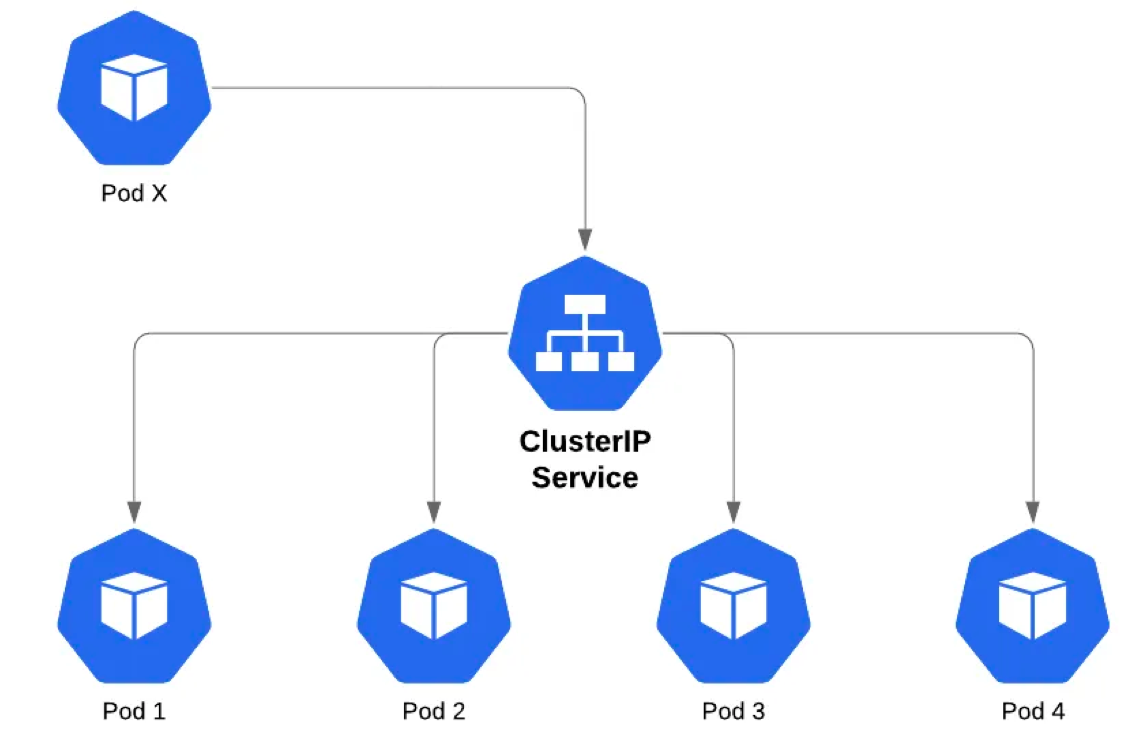

In [ ]:
!kubectl apply -f svc1.yaml

In [ ]:
# lấy các service
!kubectl get svc -o wide

# xem thông tin của service svc1
!kubectl describe svc/svc1

## Headless Service

Service thì request của nó sẽ được gửi random tới những Pod phía sau chứ không phải chính xác một thằng Pod

Nếu muốn request tới chính xác một thằng Pod, nuốn không dùng cơ chế cân bằng tải, mỗi lần truy cập tên Service nó truy cập thẳng tới IP của POD thì dùng loại Headless Service.

Một Headless Service (Service không IP) nó liên kết thẳng với IP của POD, có nghĩa bạn sẽ không tương tác trực tiếp với POD qua proxy. Tạo loại Service này giống như Service khác, chỉ việc thiết lập thêm .spec.clusterIP có giá trị None

## Tạo EndPoint cho Service (không selector)

Service trên có tên svc1, không có selector để xác định các Pod là endpoint của nó, nên có thể tự tạo ra một endpoint cùng tên svc1

In [ ]:
!kubectl apply -f endpoint.yaml

## Service có Selector, chọn các Pod là Endpoint của Service

In [ ]:
!kubectl apply -f svc2.yaml

Endpoint của svc2 là 192.168.182.11:80,192.168.41.147:80, hai IP này tương ứng là của 2 POD. Khi truy cập địa chỉ svc2:80 hoặc 10.100.165.105:80 thì <b>cân bằng tải</b> hoạt động sẽ là truy cập đến 192.168.182.11:80 (myapp1) hoặc 192.168.41.147:80 (myapp2)

## Service kiểu NodePort

Kiểu NodePort này tạo ra có thể truy cập từ ngoài internet bằng IP của các Node

In [ ]:
!kubectl appy -f svc3.yaml

## Tự sinh xác thực với openssl

Xác thực SSL gồm có server certificate và private key

In [ ]:
# sinh file tự xác thực

!openssl req -nodes -newkey rsa:2048 -keyout tls.key  -out ca.csr -subj "/CN=abc.net"

!openssl x509 -req -sha256 -days 365 -in ca.csr -signkey tls.key -out tls.crt

In [ ]:
# Tạo Secret tên secret-nginx-cert chứa các xác thực (loại ổ đĩa chứa các thông tin nhạy cảm, nhỏ)

!kubectl create secret tls secret-nginx-cert --cert=certs/tls.crt  --key=certs/tls.key

In [ ]:
# Sử dụng Secret cho Pod
# sửa lại Deployment
volumes:
        - name: cert-volume
          secret:
             secretName: "secret-nginx-cert" 